In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [6]:
df = pd.read_csv("C:\\Users\\kalta\\cleaned_fintack_data.csv")

In [9]:
features = ['Transaction_Amount', 'Risk_Score', 'IP_Address_Flag', 'Card_Age', 'Previous_Fraudulent_Activity']
target = 'Fraud_Label'

X = df[features]
y = df[target]
# splittind data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [10]:
# Create an instance of the model
model = LogisticRegression(solver='liblinear')

# Train the model on your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

Confusion Matrix:
 [[9400  780]
 [2309 2511]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     10180
           1       0.76      0.52      0.62      4820

    accuracy                           0.79     15000
   macro avg       0.78      0.72      0.74     15000
weighted avg       0.79      0.79      0.78     15000



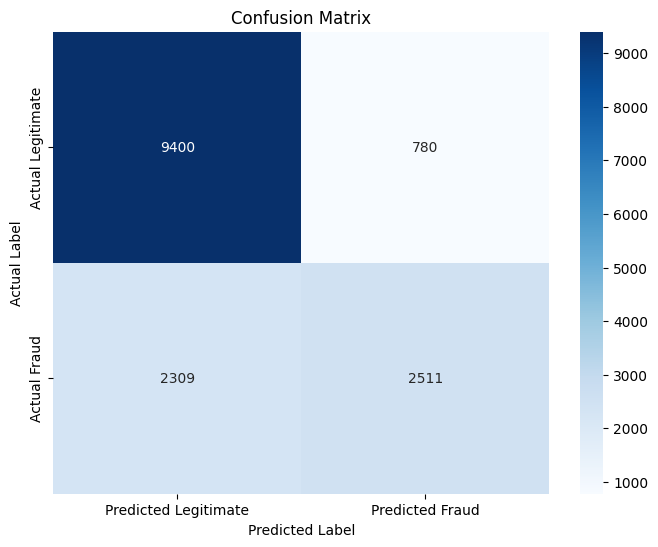

<Figure size 640x480 with 0 Axes>

In [11]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Create a classification report to get Precision, Recall, and F1-Score
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legitimate', 'Predicted Fraud'],
            yticklabels=['Actual Legitimate', 'Actual Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# You can save this plot for your portfolio
plt.savefig('confusion_matrix_plot.png')

In [12]:


# Make predictions for the entire dataset
df['Predicted_Fraud'] = model.predict(df[features])

# The 'Predicted_Fraud' column now contains your model's predictions (0 or 1)

In [13]:
conf_matrix = confusion_matrix(df['Fraud_Label'], df['Predicted_Fraud'])

# Print the confusion matrix
print("Full Confusion Matrix for Dashboard:")
print(conf_matrix)

Full Confusion Matrix for Dashboard:
[[31219  2714]
 [ 7771  8296]]


In [15]:
df.to_csv('predictions_with_model_output.csv', index=False)